# **########################################################################################################################**



# **Graph Examples and the power of python.**


## The purpose of this section is to teach how to do a bunch of differnt visuals.  Interactive graphs and more standardard graphs.  I will also be showing different ways.


# **########################################################################################################################**


In [ ]:
# adding pandas (if dealing with data, might as well add pandas everytime)
import pandas as pd

**#########################################################################################################################**

# Altair Graphing Process

 ## Data:  Vega.cars dataset
 
 **#########################################################################################################################**

In [ ]:
# lets bring in some data 
## going to use a package that contains data
### vega is pretty popular in python as a way to test out graphs/models/machine learning algorithims


from vega_datasets import data
cars=data.cars()

cars.head()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1970-01-01
3,12.0,8,304.0,150.0,16.0,amc rebel sst,USA,3433,1970-01-01
4,10.5,8,302.0,140.0,17.0,ford torino,USA,3449,1970-01-01


In [ ]:
cars.dtypes

Acceleration               float64
Cylinders                    int64
Displacement               float64
Horsepower                 float64
Miles_per_Gallon           float64
Name                        object
Origin                      object
Weight_in_lbs                int64
Year                datetime64[ns]
dtype: object

In [ ]:
cars.describe()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Weight_in_lbs
count,406.000000,406.000000,406.000000,400.000000,398.000000,406.000000
mean,15.519704,5.475369,194.779557,105.082500,23.514573,2979.413793
std,2.803359,1.712160,104.922458,38.768779,7.815984,847.004328
min,8.000000,3.000000,68.000000,46.000000,9.000000,1613.000000
25%,13.700000,4.000000,105.000000,75.750000,17.500000,2226.500000
50%,15.500000,4.000000,151.000000,95.000000,23.000000,2822.500000
75%,17.175000,8.000000,302.000000,130.000000,29.000000,3618.250000
max,24.800000,8.000000,455.000000,230.000000,46.600000,5140.000000


In [ ]:
#lets start with a simple barchart

# plot the dataset, by referencing dataframe column names (so unlike excel where you drag the name to the section, this you type it out)
## a bin is a discritization.  Think of it as 'case when 0 <5, then 5.  when 10<15, then 10..'
### most python starts with teaching matplotlib...but i  find this package easier to pickup

import altair as alt 

mybarchart = alt.Chart(cars).mark_bar().encode(    # alt.chart(cars) is like it saying it using the cars data.  mark_bar() is saying it is a markdown bar chart .encode(   is the varibles around the plot )
  x=alt.X('Miles_per_Gallon', bin=True),           # this x= saying the x axis =   alt.X(setting up x varible within the code) so if you weren't using bins, x= is enough
  y='count()',                                     # y = count is an equation saying it is counting up the instances. (row count)
)

mybarchart                                         # note, you can make your charts a variable, or you can just have it excute in the code block.  The benfit is i can call this graph on a later block vs copying and pasting the code 

alt.Chart(...)

In [ ]:
# lets do a stacked bar graph
alt.Chart(cars).mark_bar().encode(
  x=alt.X('Miles_per_Gallon', bin=True),
  y='count()',
  color='Origin'                               #only differnce is added the color is based on the field 'origin'
)

alt.Chart(...)

In [ ]:
# here is the exact same data but i broke up the bin


alt.Chart(cars).mark_bar().encode(
  x=alt.X('Miles_per_Gallon', bin=False),            # took off the bin so it is showing the count by each mpg (the bars look taller, but thats cause the y scale is different above graph goes to 100)
  y='count()',
)

#one thing to note is that altair is a package that the graphs are nicely intractive

alt.Chart(...)

In [ ]:
# horizontal bar plot  lets take a look at the mean MPG by country


alt.Chart(cars).mark_bar().encode(
  x='mean(Miles_per_Gallon)',                             # so instead of count above, doing the mean/average of the Miles_per_Gallon
  y='Origin',                                             # seperating it by the different types of countries
  color='Origin'                                          # and making the color for each country different
)

alt.Chart(...)

In [ ]:
# horizontal bar plot  lets take a look at the mean Horsepower by country


alt.Chart(cars).mark_bar().encode(
  x='mean(Horsepower)',                                    # same example as above but I wanted to point out what 'merica lacks in MPG, it makes up for by not using lawnmower engines
  y='Origin',
  color='Origin'
)

alt.Chart(...)

In [ ]:
# here is an  example of a nice interactive graph

interval = alt.selection_interval()                                  # this is saying that when i draw a selection on the graph it will be the selection used

base = alt.Chart(cars).mark_point().encode(                          #making a scatter plot (but interactive between the two)
  y='Miles_per_Gallon',                                              # making the Y axis the 
  color=alt.condition(interval, 'Origin', alt.value('lightgray'))    # saying that the inteval graph has origin (country as color type)  until drawn by mouse, then the section goes to grey
).properties(                                                        # properties is general attritibutes about the graphs only set up for this graph is that it says there will be a differnt astetic for when something is selected
  selection=interval                                                 # showing that selection for tis will be the the interval created above.  which is saying is a selction selected by a person
)
                                                                     ## if you want a slection to be specified, you could do it by making it a variable, or an array of data points.  
base.encode(x='Acceleration') | base.encode(x='Horsepower')         # base.encode = new example:    | base.encode(x='Year')     | base.encode(x='Weight_in_lbs')         | base.encode(x='Cylinders') 

# Full honesty this is a bit of an advance graph it is cool though
## so if i will show how to detrmine whether or not something is inveserly propotional, or you can always put these in a graph together and do a trial and error.

alt.HConcatChart(...)

In [ ]:
#told ya i can refrence it later
mybarchart

alt.Chart(...)

In [ ]:
#here is an example if you don't want the linked graphs, but still want it to be intractive


interval = alt.selection_interval()

alt.Chart(cars).mark_point().encode(
  x='Horsepower',
  y='Miles_per_Gallon',
  color=alt.condition(interval, 'Origin', alt.value('lightgray'))
).properties(
  selection=interval                                                # if i want the slection to be a section of the graph i just have to give it the range (array) of data points
)

alt.Chart(...)

In [ ]:
# This type of interactive graph does draw a section but allows you to move and zoom in

alt.Chart(cars).mark_point().encode(
  x='Horsepower',
  y='Miles_per_Gallon',
  color='Origin'
).interactive()

alt.Chart(...)

In [ ]:
# lets do a scatter plot combined with a line graph

points = alt.Chart(cars).mark_point().encode(                             # this is technically a category scatterplot.  See example in seaborn below for an easier explanation
  x='Year:T',
  y='Miles_per_Gallon',
  color='Origin'
).properties(
  width=800                                                               #setting how many pixel wide the graph is   yes you can also set the length and thus can do a bunch of html alignment
)

lines = alt.Chart(cars).mark_line().encode(
  x='Year:T',
  y='mean(Miles_per_Gallon)',
  color='Origin'
).properties(
  width=800
).interactive(bind_y=False)
              
points + lines


# this is telling you 

alt.LayerChart(...)

In [ ]:

interval = alt.selection_interval()

points = alt.Chart(cars).mark_point().encode(
  x='Horsepower',
  y='Miles_per_Gallon',
  color=alt.condition(interval, 'Origin', alt.value('lightgray'))
).properties(
  selection=interval
)

histogram = alt.Chart(cars).mark_bar().encode(
  x='count()',
  y='Origin',
  color='Origin'
).transform_filter(interval)

points & histogram

alt.VConcatChart(...)

**#########################################################################################################################** 

# **Matplotlab introduction**

## Data:  Vega.cars dataset

**#########################################################################################################################**




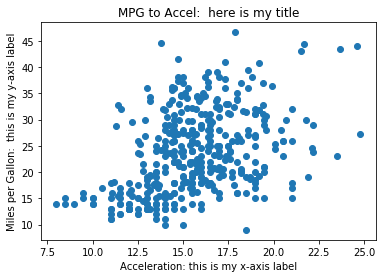

In [ ]:
# lets do a more standard plot instead, using matlabplot.  
## matplotlab is the old school method for ploting  the data.  
### full honesty i don't care for the syntax but it works.


import matplotlib.pyplot as plt


## Plot
fig, ax = plt.subplots()
myscatterplot = ax.scatter(
x=cars["Acceleration"],         # x values
y=cars["Miles_per_Gallon"],     # y values  
)

ax.set_xlabel("Acceleration: this is my x-axis label")
ax.set_ylabel("Miles per Gallon:  this is my y-axis label")
ax.set_title("MPG to Accel:  here is my title")

myscatterplot

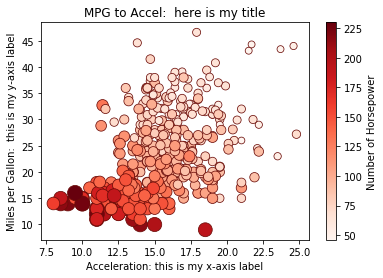

In [ ]:
# lets do a bit more advance  (lets amke the size of the points the horsepower, and the color the orignin country)
import matplotlib.pyplot as plt

x=cars.Acceleration
y=cars.Miles_per_Gallon
c=cars.Origin

## Plot
fig, ax = plt.subplots()

myscatterplot = ax.scatter(
x=cars["Acceleration"],              # x values
y=cars["Miles_per_Gallon"],          # y values  
s=cars["Horsepower"],                # setting the size on how much hp
c=cars["Horsepower"],                # setting the color on a scale of HP 
cmap=plt.cm.Reds,                    # i could use a rainbow scale but, i like the mono-colors
vmin= cars["Horsepower"].min(),      # setting lowest possible scale for color and size
vmax=cars["Horsepower"].max(),       # setting the max possible scale for color and size
edgecolor="#6b0c08",                 # just getting the line color around the scatter points  (yes you can have a different one by data type)
linewidth = 0.75                     # just settign the line width (can be as much or little as you want)
)
ax.set_xlabel("Acceleration: this is my x-axis label")
ax.set_ylabel("Miles per Gallon:  this is my y-axis label")
ax.set_title("MPG to Accel:  here is my title")
cbar=fig.colorbar(myscatterplot)
cbar.set_label("Number of Horsepower")

**#########################################################################################################################**

# **Seaborn visualizations**
## Data:  Tips Dataset from seaborn


**#########################################################################################################################**

In [ ]:
import seaborn as sns                            # importing the seaborn package

sns.set()                                        # interesting line of code, it is converting all data types to a 'set'.  Set: is data object that only contains unique values
                                                 ## meaning if you had numbers = [1,1,2,3,4,4], the set of the numbers set(numbers) would equal [1,2,3,4].  
                                                 ### A set was demo-ed in the titanic dataset for calcuating mode.

tips = sns.load_dataset("tips")                  # naming a dataset of 'tips' that comes loaded with seaborn            

tips.head()                                      # displaying the data to get an idea of the dataset 

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
tips.dtypes  # seeing the datatypes as those does impact what graphs can be done with the data

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [ ]:
tips.info()           #info is the same above but says if there are null vlaues or not.  shouldn't be in a set dataframe but always worth checking

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


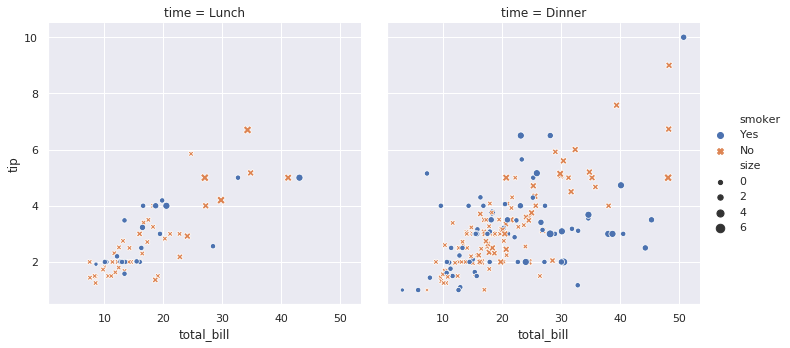

In [ ]:
# showing a scatter plots where it is seperated by the time of meal  
## these examples work well for when you are trying to see if a particular field is driving a major change in values
### for the earlier Rcomander the difference was brand loyality.  for this it will be party size, time of day, or smoker or not  (hint, folks meals cost more  at dinner)
#### and the larger the party size generally = the larger the tip.  

sns.relplot(x="total_bill", y="tip", col="time",                     # x is showing the total bill to tip ratio.  col = time, is actually broken out the two graphs
            hue="smoker", style="smoker", size="size",               # hue = color, but style = the difference in data point styles (so each category = a point).  size = size of the data point, larger the party size the larger the pixel (see matplotlib above)
            data=tips)                                               # setting the data as tips for all this.  don't need to call out data could do each point like x=tips["total_bill"]...
                                                                     ## notice how python is very forgiving in 


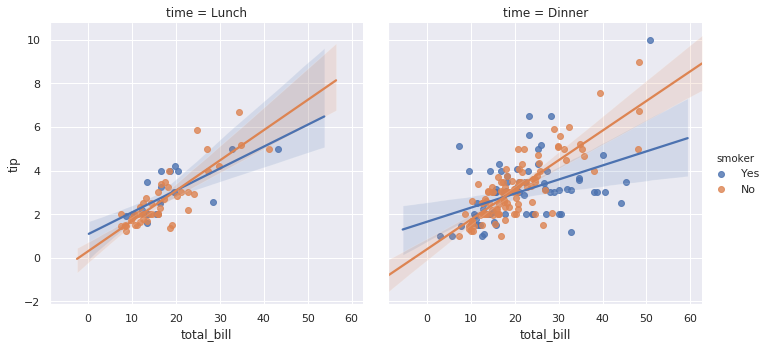

In [ ]:
# say you want to look at the linear projection of the tips you will be making 

sns.lmplot(x="total_bill", y="tip", col="time", hue="smoker",                 # whatever you put into the y= part will be the linear prediction off your x varaible.  col=time new graphs, like in obiee if you put it in the type spot      
           data=tips)                                                       ## hue = color break down, but when it splits the line also splits automatically

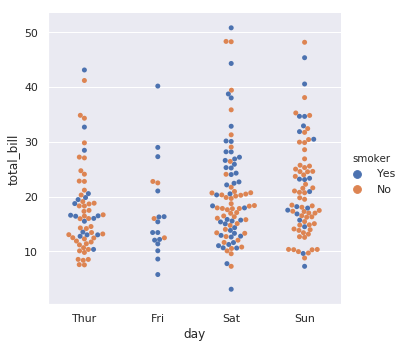

In [ ]:
# a catogry based scatter plot
## good for seing what day of the week is busy.  
### man smokers love coming out on friday and saturday but run away sunday.


sns.catplot(x="day", y="total_bill", hue="smoker",
            kind="swarm", data=tips);

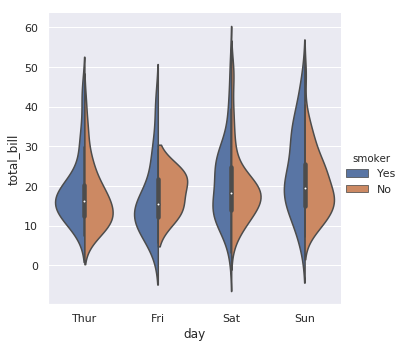

In [ ]:
# difference between swarm and violin....i prefer violin, cause it is easier to demonstrate the std of the data points between groups or from on cateogry to the next

sns.catplot(x="day", y="total_bill", hue="smoker",
            kind="violin", split=True, data=tips);

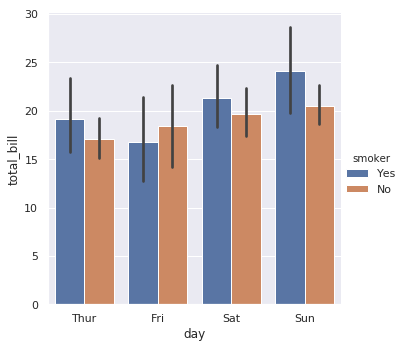

In [ ]:
# instead of a swarm or violin there is a bar or even box plot option.  never do bar, do a boxplot or one of the other options

sns.catplot(x="day", y="total_bill", hue="smoker",
            kind="bar", data=tips)

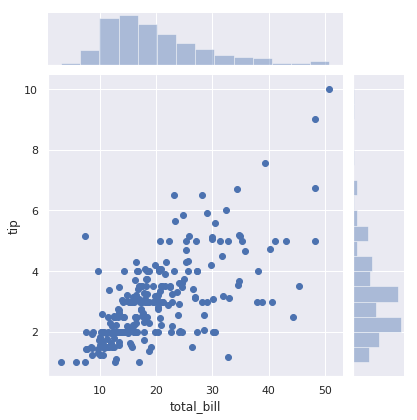

In [ ]:
# joint plot, it shows the density of the data points
## in this example it shows most of the custoemrs are less than 30 dollars but there are a few that spend more and tip more
### odly though the distribution in tips follow the same densinty as total bill meaning these are highly coorelated.  (unless there is a cheapscate in the data)

sns.jointplot(x="total_bill", y="tip",data=tips)

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


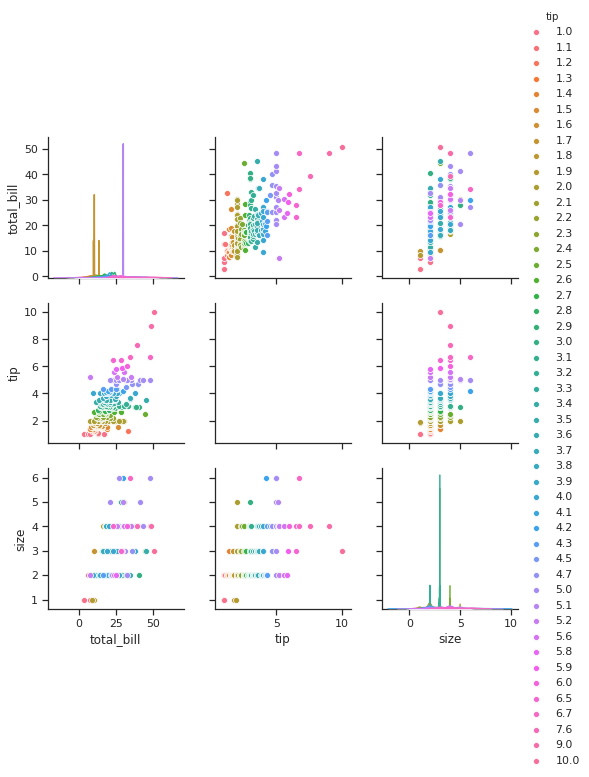

In [ ]:
#lets do a pairwise example
## a pairwise plot generally shows the coorelation between the data points and the dependent variable (what you want to predict)

tips.tip = round(tips.tip, 1)

sns.pairplot(data=tips, hue="tip")

#okay, should have binned the options on tips (put it in to catgories like less than 2, 2-4, etc.)

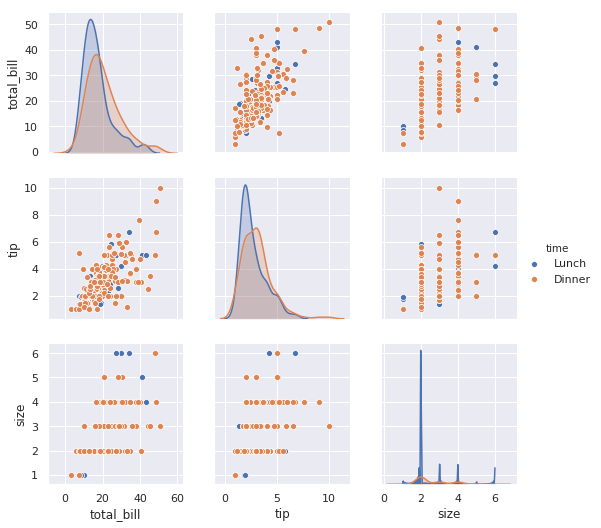

In [ ]:
# so lets do antoher exmaple and see if there is pattern on earning tips by time of meal

tips.tip = round(tips.tip, 1)

sns.pairplot(data=tips, hue="time")

#okay, should have binned the options on tips

## Customizing plot appearance for Seaborn

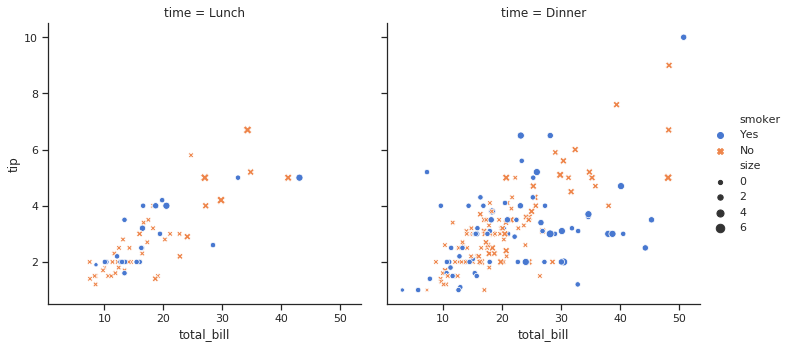

In [ ]:
# notice the background and is no longer grey and the lines that cross are also gone
## all graphs in python are 100% customizable if you know how to edit the features
### to do that, best way is to google seaborn.replot (or whatever the graph you want to edit) properties/options

sns.set(style="ticks", palette="muted")
sns.relplot(x="total_bill", y="tip", col="time",
            hue="smoker", style="smoker", size="size",
            data=tips)

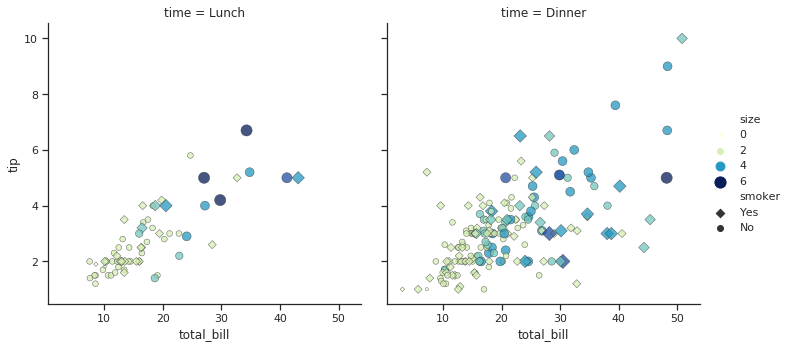

In [ ]:
# lets bedazzle the above graphic

sns.relplot(x="total_bill", y="tip", col="time",                       # same as always
            hue="size", style="smoker", size="size",                   # still seen this
            palette="YlGnBu", markers=["D", "o"], sizes=(10, 125),     # palette = a predfined color scheme...and i chose puke green, you can chang eth markers, D = diamond, O = the circles, and i could set their default 
            edgecolor=".2", linewidth=.5, alpha=.75,                   ## value color size.  and you have seen edgecolor, and linewidth in the matplotlib above examples 
            data=tips);

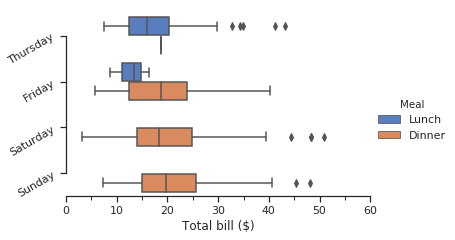

In [ ]:
#here is a category boxplot with a whole lote of customization

g = sns.catplot(x="total_bill", y="day", hue="time",
                height=3.5, aspect=1.5,
                kind="box", legend=False, data=tips);
g.add_legend(title="Meal")
g.set_axis_labels("Total bill ($)", "")
g.set(xlim=(0, 60), yticklabels=["Thursday", "Friday", "Saturday", "Sunday"])
g.despine(trim=True)
g.fig.set_size_inches(6.5, 3.5)
g.ax.set_xticks([5, 15, 25, 35, 45, 55], minor=True);
plt.setp(g.ax.get_yticklabels(), rotation=30);

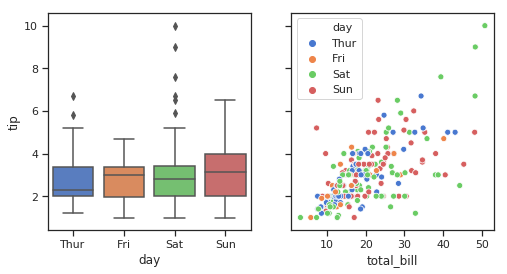

In [ ]:
#here is how you can do a duel graph in matplotlib.  (i don't suggest doing it unless you want to hate your next couple of hours)

f, axes = plt.subplots(1, 2, sharey=True, figsize=(8, 4))                       # this is showing that there will be 2 graphs (subplot - graph)
sns.boxplot(x="day", y="tip", data=tips, ax=axes[0])                            # first graph code making a box plot
sns.scatterplot(x="total_bill", y="tip", hue="day", data=tips, ax=axes[1]);     # second graph being a scatterplot

## Additoinal seaborn graphs that are not a good fit for the tips dataset

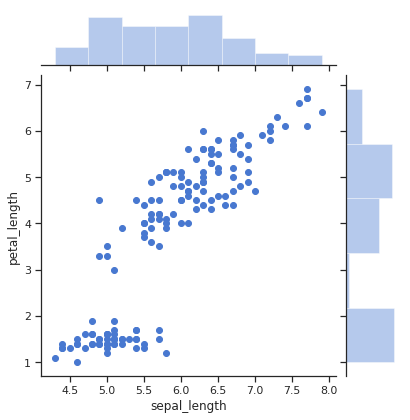

In [ ]:
iris = sns.load_dataset("iris")
sns.jointplot(x="sepal_length", y="petal_length", data=iris);

# that bottom seperation tells me that there is probably a logical grouping

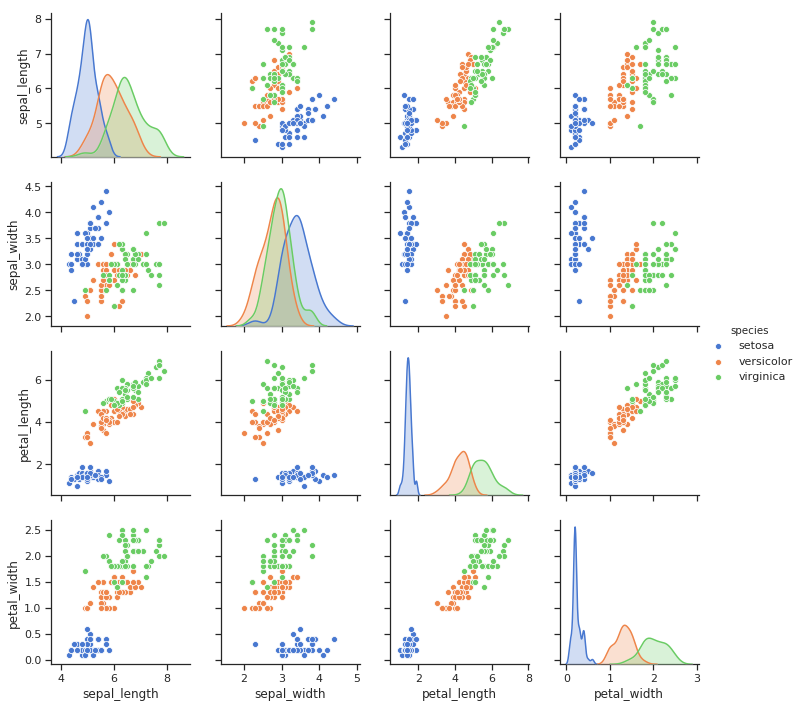

In [ ]:
sns.pairplot(data=iris, hue="species");


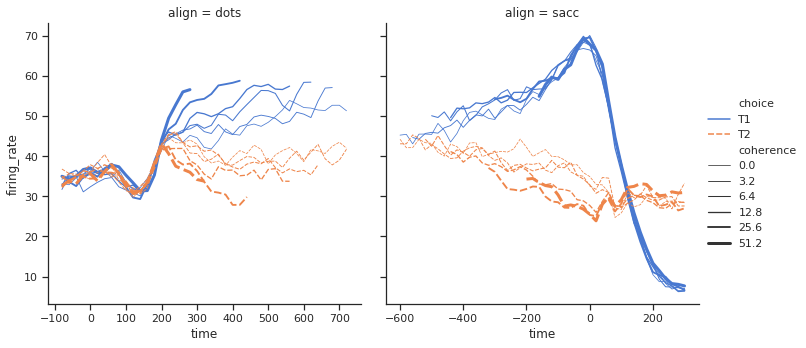

In [ ]:
dots = sns.load_dataset("dots")
sns.relplot(x="time", y="firing_rate", col="align",
            hue="choice", size="coherence", style="choice",
            facet_kws=dict(sharex=False),
            kind="line", legend="full", data=dots);

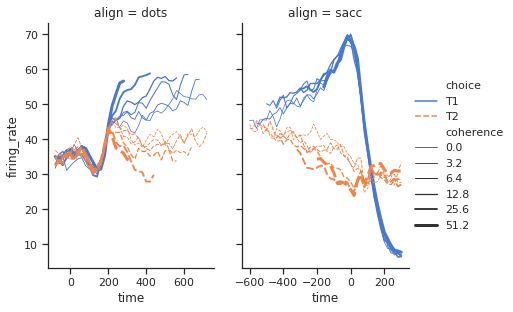

In [ ]:
sns.relplot(x="time", y="firing_rate", col="align",
            hue="choice", size="coherence", style="choice",
            height=4.5, aspect=2 / 3,
            facet_kws=dict(sharex=False),
            kind="line", legend="full", data=dots);

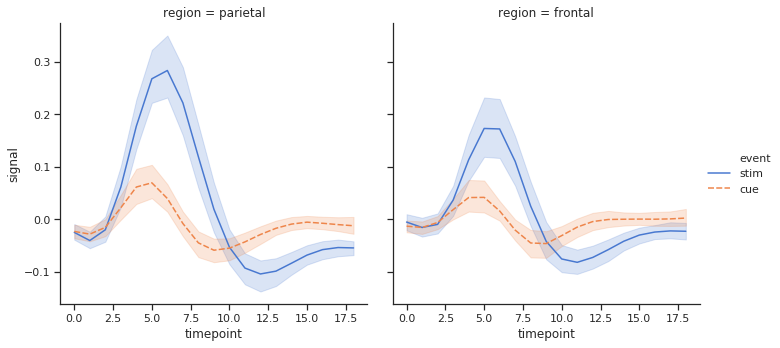

In [ ]:
fmri = sns.load_dataset("fmri")
sns.relplot(x="timepoint", y="signal", col="region",
            hue="event", style="event",
            kind="line", data=fmri);

#####################################################################################################################

# GGplot visualizations
## Data: Tips Dataset from seaborn

#####################################################################################################################

Sources:

http://seaborn.pydata.org/introduction.html

http://ggplot.yhathq.com/

http://bokeh.pydata.org/en/latest/

http://www.pygal.org/en/latest/index.html

